<a href="https://colab.research.google.com/github/wpqc21/VulNeuralNetworks/blob/main/Random_Walk_TensorFlow_01_26_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pylab import *
import plotly.graph_objects as go
import plotly.express as px
import random
from random import randint
import matplotlib.pyplot as plt
import pylab
import math
import statistics

np.set_printoptions(threshold=np.inf)

#### 03/02/2022

# Fractal Landscape - Smooth Landscape Contour Map to Vector Field

### Fractal Landscape - Using Perlin Noise to Generate Smooth Lanscape

In [2]:
# https://jackmckew.dev/3d-terrain-in-python.html
# 3D Terrain in Python, Jack McKew Blog

In [3]:
%matplotlib inline
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

In [4]:
# Scale 2x the Shape
shape = (50,50)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = random.randint(0, 100)

In [5]:
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=seed)

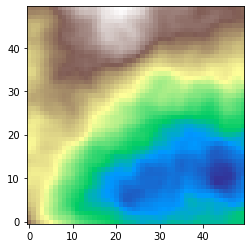

In [6]:
matplotlib.pyplot.imshow(world,cmap='terrain', origin='lower')

In [7]:
world

array([[ 0.00000000e+00, -3.25860269e-02, -6.18328974e-02,
        -8.24457034e-02, -9.94399637e-02, -1.16729051e-01,
        -1.34102792e-01, -1.46867871e-01, -1.57682195e-01,
        -1.68891668e-01, -1.81605577e-01, -1.94627941e-01,
        -2.05491826e-01, -2.13497385e-01, -2.19933853e-01,
        -2.25302517e-01, -2.30232969e-01, -2.35343933e-01,
        -2.41072401e-01, -2.47570023e-01, -2.54667163e-01,
        -2.61903584e-01, -2.68617719e-01, -2.71609098e-01,
        -2.73912221e-01, -2.80257940e-01, -2.85580158e-01,
        -2.84421057e-01, -2.81563014e-01, -2.82216907e-01,
        -2.83633798e-01, -2.78956264e-01, -2.72533238e-01,
        -2.70885408e-01, -2.72677600e-01, -2.72436202e-01,
        -2.74965793e-01, -2.72869229e-01, -2.67840892e-01,
        -2.66385704e-01, -2.70120621e-01, -2.71297812e-01,
        -2.71652073e-01, -2.71749705e-01, -2.71332771e-01,
        -2.65995890e-01, -2.59898484e-01, -2.58781254e-01,
        -2.59035230e-01, -2.55941123e-01],
       [-2.60

In [8]:
# Multiply by 1000 in order to scale correctly
world = world*1000

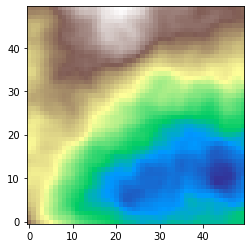

In [9]:
matplotlib.pyplot.imshow(world,cmap='terrain', origin='lower')

In [10]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

#Elevation/Height = Z
Z = world

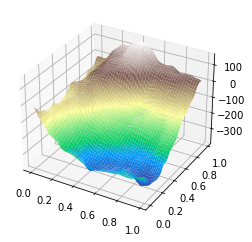

In [11]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,Z,cmap='terrain')

terrain_cmap = matplotlib.cm.get_cmap('terrain')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)

import plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(colorscale=terrain,z=Z)])

fig.update_layout(title='Random 3D Terrain')

fig.show()

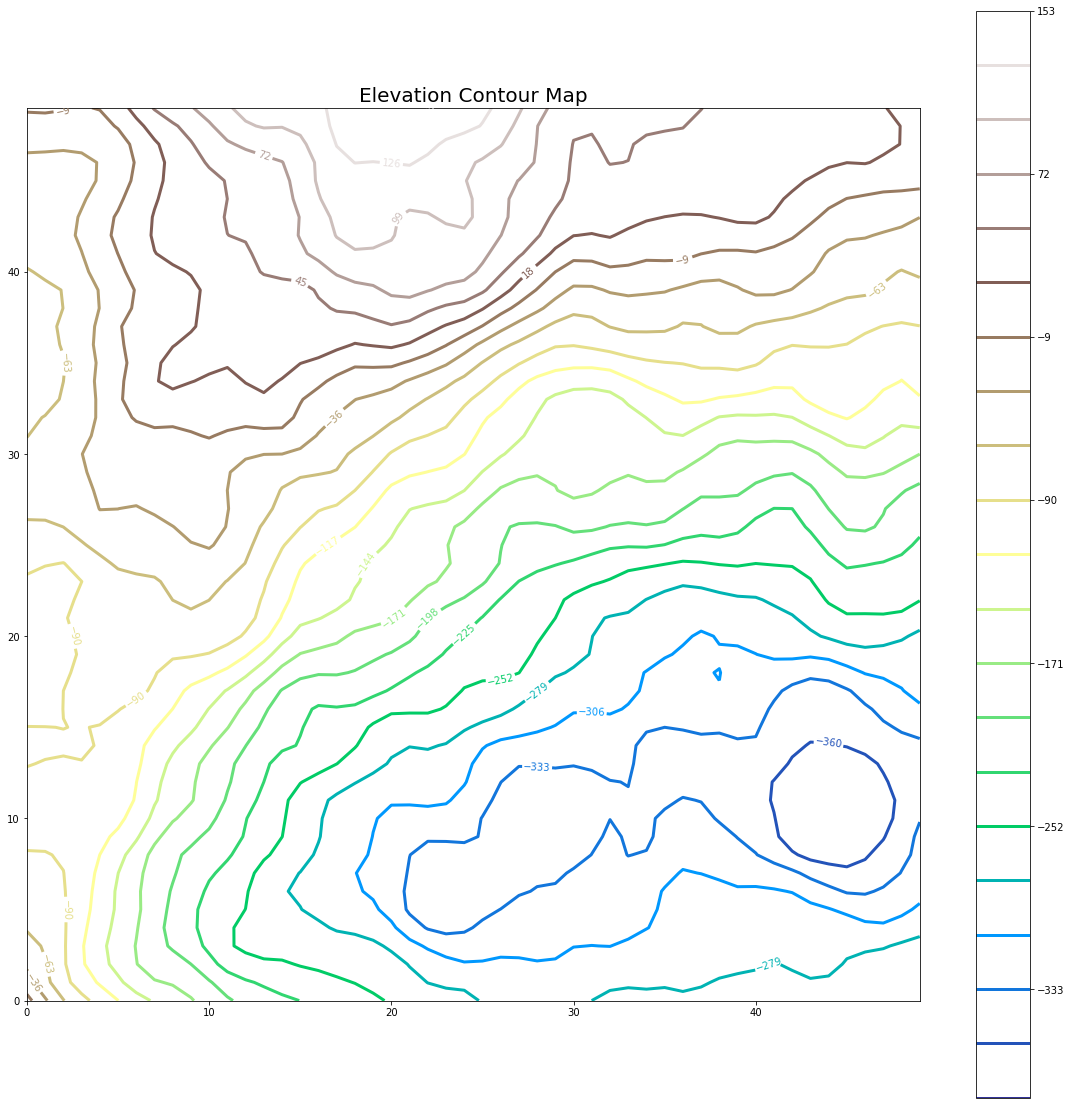

In [12]:
#Find Min, Max, Divide Absolute Value of Sum by 20

a = round(Z.min())

b = round(Z.max())

c = round((abs(Z.min()) + abs(Z.max())) / 20)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)
ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3)
ax.clabel(ecm, fontsize=10)
plt.title("Elevation Contour Map", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

(0.0, 49.0)
(0.0, 49.0)


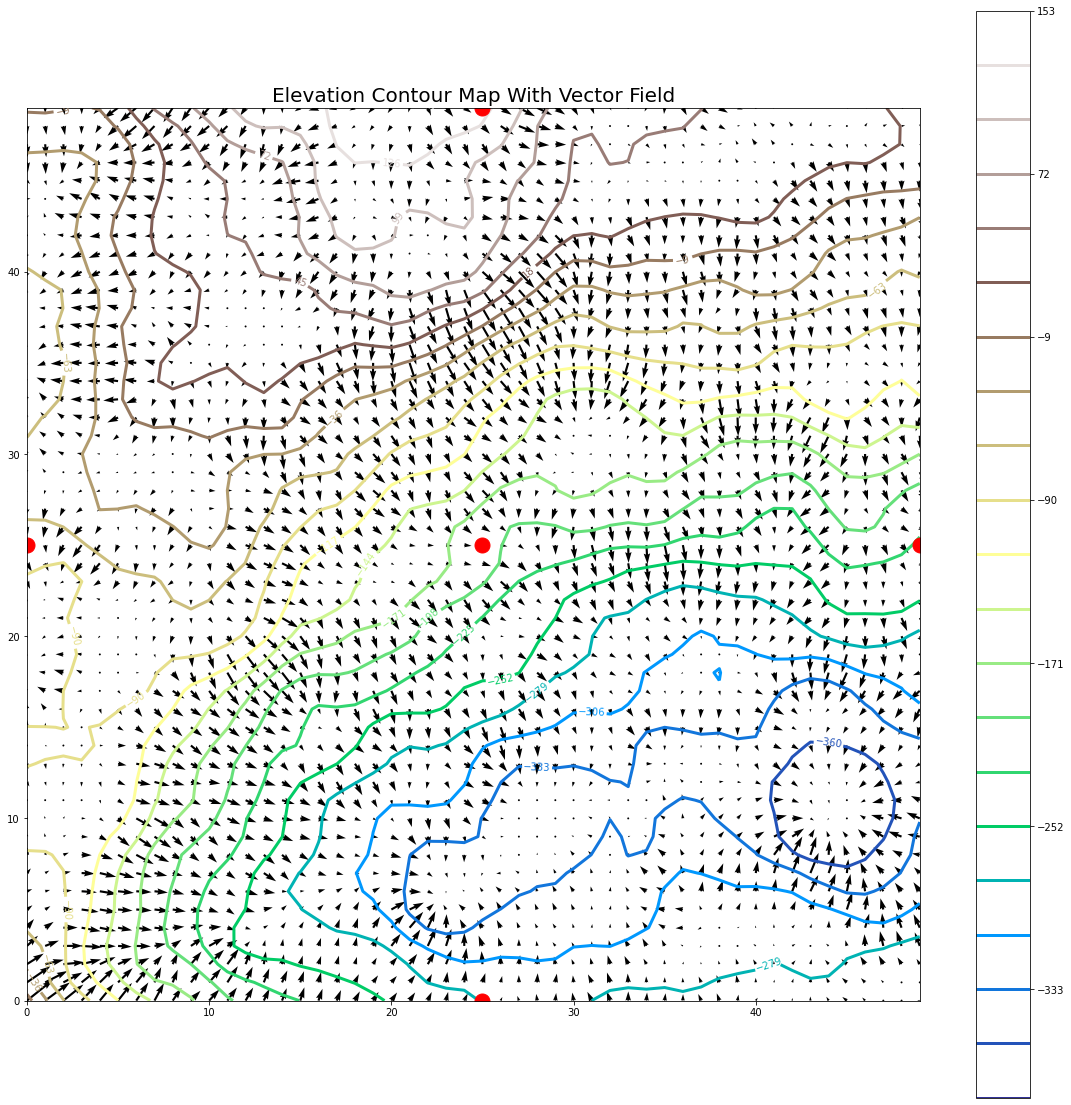

In [13]:
x = np.arange(0,50,1)
y = np.arange(0,50,1)

X, Y = np.meshgrid(x, y)

# Negative Z: Arrows Point From Higher to Lower Elevation
# Positive Z: Arrows Point From Lower to Higher Elevation
#dy, dx Initialize Order
dy, dx = np.gradient(-Z)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3)
ax.clabel(ecm, fontsize=10)


#Use Quiver to Create Vector Field
#Input Order dx, dy
ax.quiver(X, Y, dx, dy)

print(plt.xlim())
print(plt.ylim())

ax.set_aspect('equal')

plt.title("Elevation Contour Map With Vector Field", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(25,0,'ro', markersize=15) 
plt.plot(25,49,'ro', markersize=15)
plt.plot(25,25,'ro', markersize=15) 
plt.plot(0,25,'ro', markersize=15) 
plt.plot(49,25,'ro', markersize=15) 

plt.show()


In [14]:
print("Coordinates: X, Y: \t\t\t\t", "dx, dy") 
print("\t","(",X[25][25],",", Y[0][0],")","\t\t", "(",dx[25][0],",", dy[25][0],")")
print("\t","(",X[25][25],",", Y[49][49],")","\t\t", "(",dx[25][49],",", dy[25][49],")")
print("\n")
print("\t","(",X[25][25],",", Y[25][25],")","\t\t", "(",dx[25][25],",", dy[25][25],")")
print("\n")
print("\t","(",X[0][0],",", Y[25][25],")","\t\t", "(",dx[0][25],",", dy[0][25],")")
print("\t","(",X[49][49],",", Y[25][25],")","\t\t", "(",dx[49][25],",", dy[49][25],")")

Coordinates: X, Y: 				 dx, dy
	 ( 25 , 0 ) 		 ( 4.784964025020599 , -7.081776857376099 )
	 ( 25 , 49 ) 		 ( 10.257616639137268 , -8.868291974067688 )


	 ( 25 , 25 ) 		 ( 9.34271514415741 , -0.6802976131439209 )


	 ( 0 , 25 ) 		 ( 5.83396852016449 , 6.250560283660889 )
	 ( 49 , 25 ) 		 ( 7.894851267337799 , -5.235642194747925 )


### Symmetric Bowl Plot: Z = X * X + Y * Y

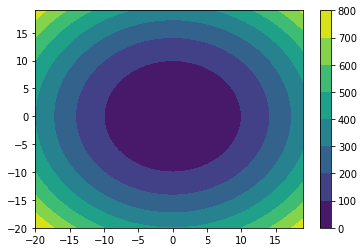

In [15]:
x = np.arange(-20,20,1)
y = np.arange(-20,20,1)

X, Y = np.meshgrid(x, y)

Z = X*X + Y*Y

cp = plt.contourf(X, Y, Z)
cb = plt.colorbar(cp)

In [16]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

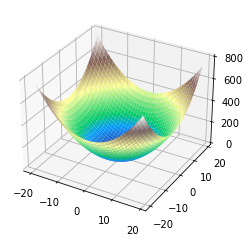

In [17]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z,cmap='terrain')

terrain_cmap = matplotlib.cm.get_cmap('terrain')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)

import plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(colorscale=terrain,z=Z)])

fig.update_layout(title='Symmetric Bowl')

fig.show()

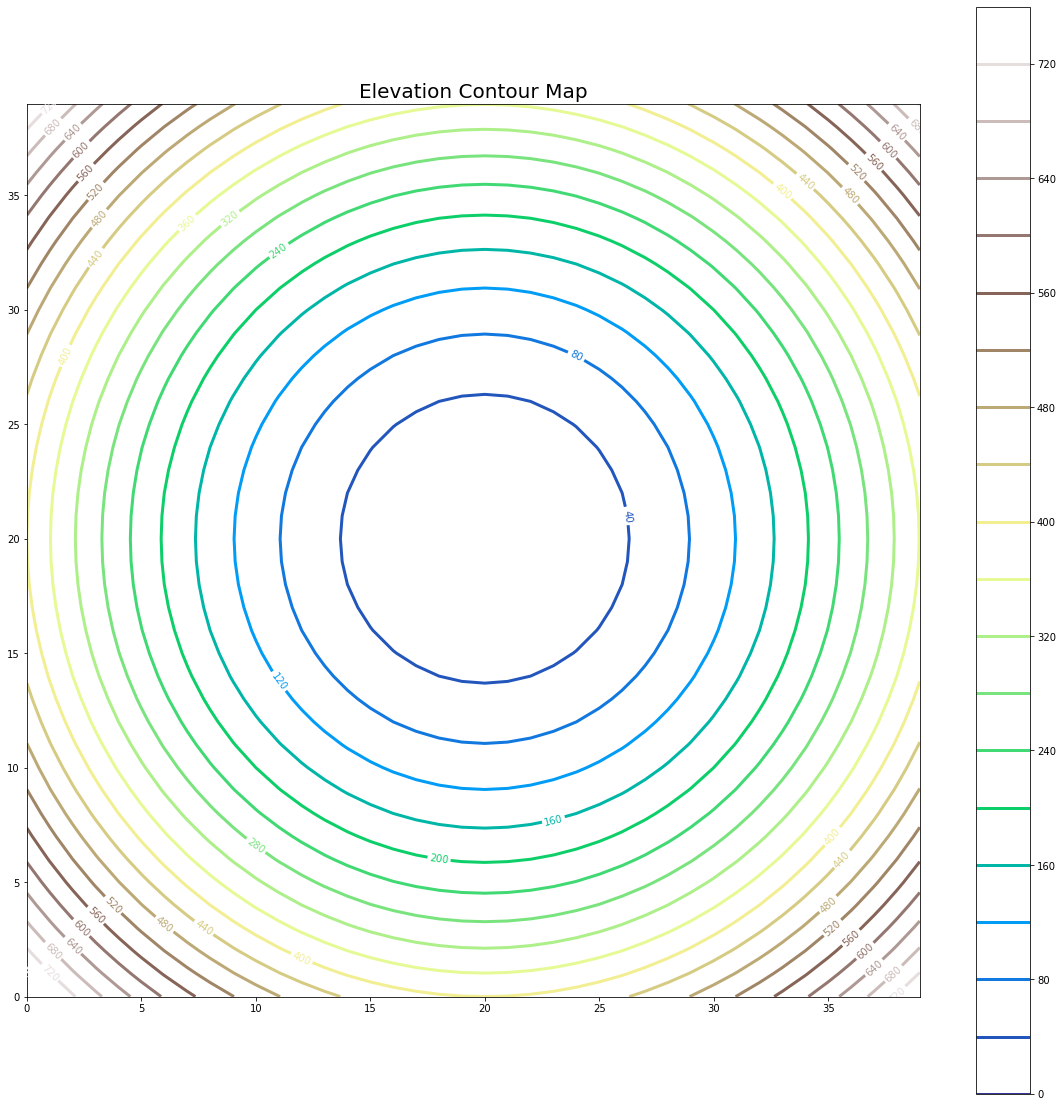

In [18]:
#Find Min, Max, Divide Absolute Value of Sum by 20

a = round(Z.min())

b = round(Z.max())

c = round((abs(Z.min()) + abs(Z.max())) / 20)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3)
ax.clabel(ecm, fontsize=10)

plt.title("Elevation Contour Map", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

(0.0, 39.0)
(0.0, 39.0)


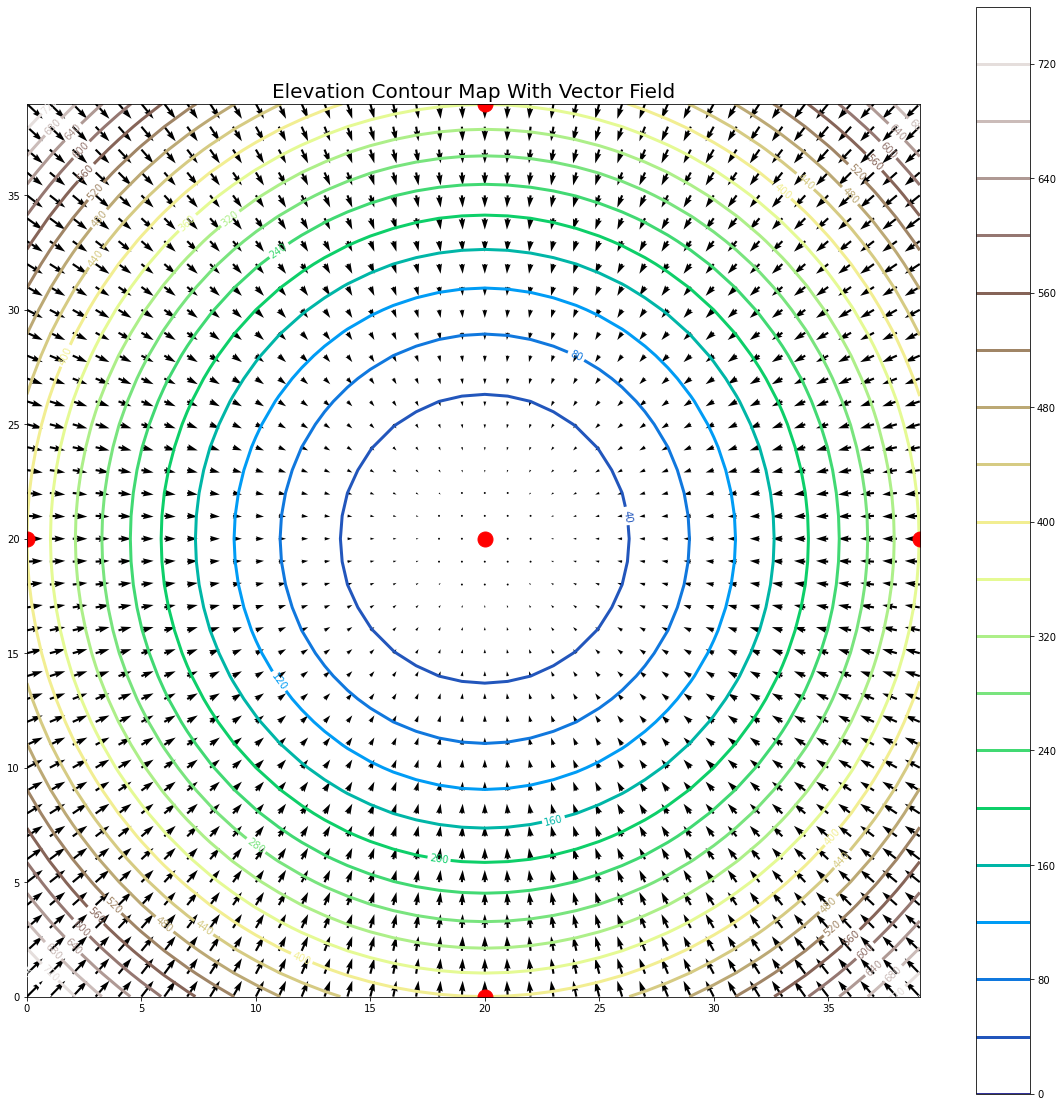

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.arange(0,40,1)
y = np.arange(0,40,1)

X, Y = np.meshgrid(x, y)

# Negative Z: Arrows Point From Higher to Lower Elevation
# Positive Z: Arrows Point From Lower to Higher Elevation
dy, dx = np.gradient(-Z)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3)
ax.clabel(ecm, fontsize=10)

ax.quiver(X, Y, dx, dy)

ax.set_aspect('equal')

print(plt.xlim())
print(plt.ylim())

plt.title("Elevation Contour Map With Vector Field", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(20,0,'ro', markersize=15) 
plt.plot(20,39,'ro', markersize=15)
plt.plot(20,20,'ro', markersize=15) 
plt.plot(0,20,'ro', markersize=15) 
plt.plot(39,20,'ro', markersize=15) 

plt.show()


In [20]:
print("Coordinates: X, Y: \t\t\t\t", "dx, dy") 
print("\t","(",X[20][20],",", Y[0][0],")","\t\t\t", "(",dx[20][0],",", dy[20][0],")")
print("\t","(",X[20][20],",", Y[39][39],")","\t\t\t", "(",dx[20][39],",", dy[20][39],")")
print("\n")
print("\t","(",X[20][20],",", Y[20][20],")","\t\t\t", "(",dx[20][20],",", dy[20][20],")")
print("\n")
print("\t","(",X[0][0],",", Y[20][20],")","\t\t\t", "(",dx[0][20],",", dy[0][20],")")
print("\t","(",X[39][39],",", Y[20][20],")","\t\t\t", "(",dx[39][20],",", dy[39][20],")")

Coordinates: X, Y: 				 dx, dy
	 ( 20 , 0 ) 			 ( 39.0 , 0.0 )
	 ( 20 , 39 ) 			 ( -37.0 , 0.0 )


	 ( 20 , 20 ) 			 ( 0.0 , 0.0 )


	 ( 0 , 20 ) 			 ( 0.0 , 39.0 )
	 ( 39 , 20 ) 			 ( 0.0 , -37.0 )


### Asymmetric Bowl Plot: Z = A * X * X + B * Y * Y

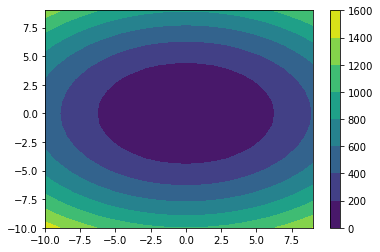

In [21]:
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

X, Y = np.meshgrid(x, y)

A = 5
B = 10

Z = A*X*X + B*Y*Y

cp = plt.contourf(X, Y, Z)
cb = plt.colorbar(cp)

In [22]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

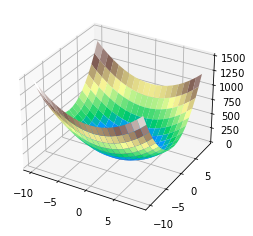

In [23]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z,cmap='terrain')

terrain_cmap = matplotlib.cm.get_cmap('terrain')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)

import plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(colorscale=terrain,z=Z)])

fig.update_layout(title='Asymmetric Bowl')

fig.show()

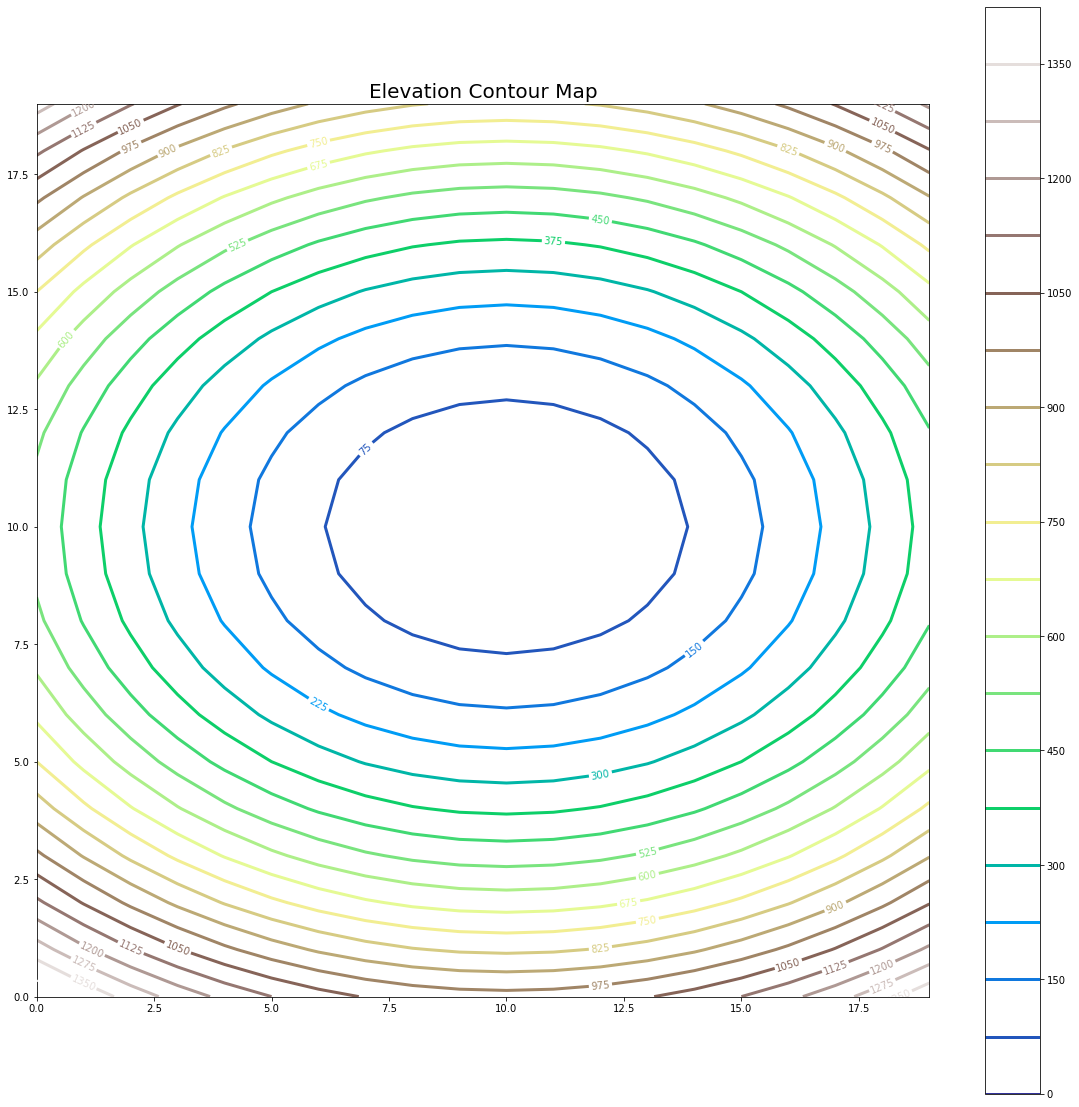

In [24]:
a = round(Z.min())

b = round(Z.max())

c = round((abs(Z.min()) + abs(Z.max())) / 20)


fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3)
ax.clabel(ecm, fontsize=10)

plt.title("Elevation Contour Map", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

(-0.9500000000000001, 19.95)
(-0.9500000000000001, 19.95)


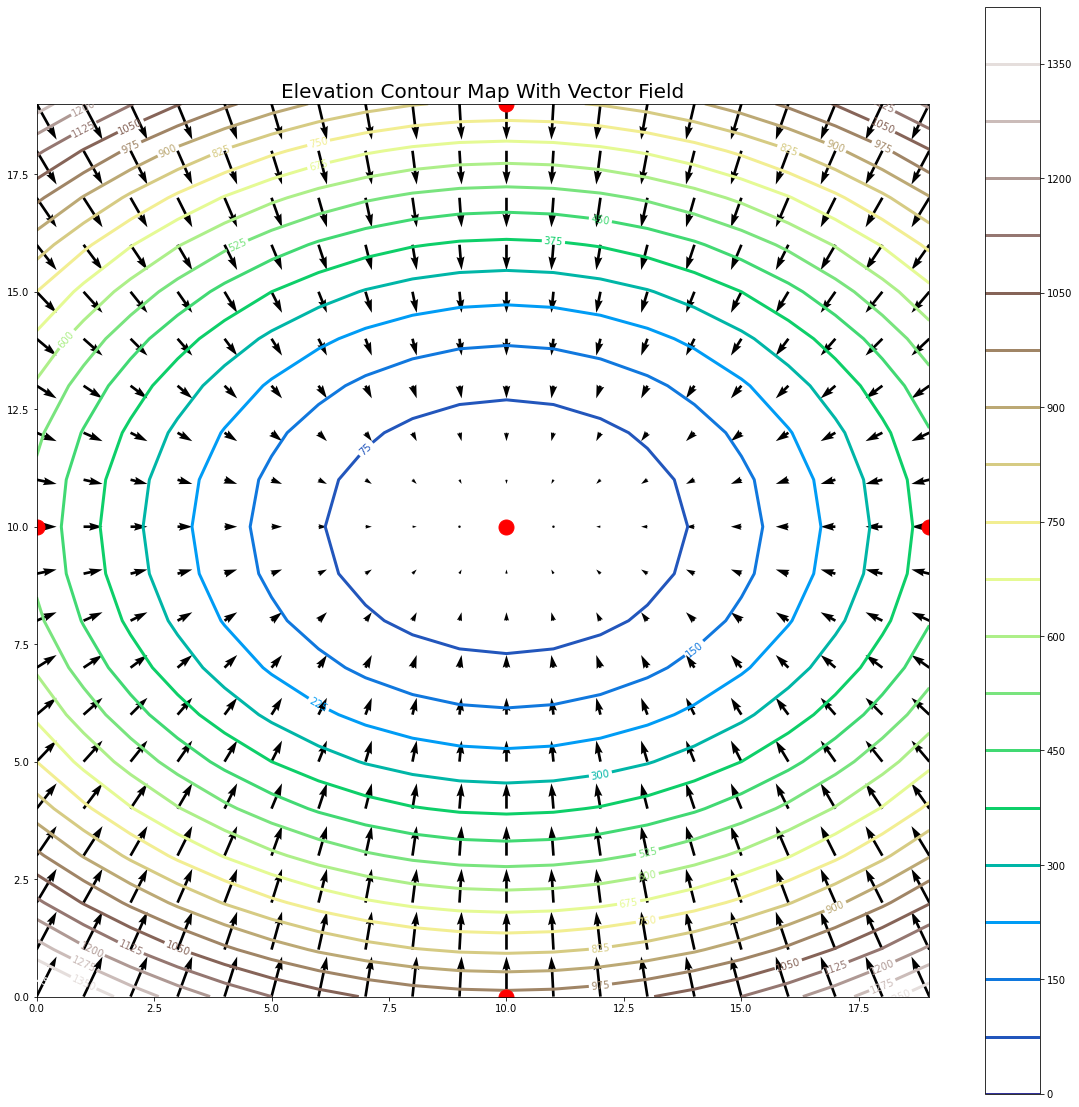

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.arange(0,20,1)
y = np.arange(0,20,1)

X, Y = np.meshgrid(x, y)

# Negative Z: Arrows Point From Higher to Lower Elevation
# Positive Z: Arrows Point From Lower to Higher Elevation
# Initialize Order dy, dx 
dy, dx = np.gradient(-Z)

fig, ax = plt.subplots(figsize=(20,20), facecolor='white')

#Input Order dx, dy
ax.quiver(X, Y, dx, dy)

ax.set_aspect('equal')


print(plt.xlim())
print(plt.ylim())

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3)
ax.clabel(ecm, fontsize=10)

plt.title("Elevation Contour Map With Vector Field", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(10,0,'ro', markersize=15) 
plt.plot(10,19,'ro', markersize=15)
plt.plot(10,10,'ro', markersize=15) 
plt.plot(0,10,'ro', markersize=15) 
plt.plot(19,10,'ro', markersize=15)

plt.show()


In [26]:
print("Coordinates: X, Y: \t\t\t\t", "dx, dy") 
print("\t","(",X[10][10],",", Y[0][0],")","\t\t\t", "(",dx[10][0],",", dy[10][0],")")
print("\t","(",X[10][10],",", Y[19][19],")","\t\t\t", "(",dx[10][19],",", dy[10][19],")")
print("\n")
print("\t","(",X[10][10],",", Y[10][10],")","\t\t\t", "(",dx[10][10],",", dy[10][10],")")
print("\n")
print("\t","(",X[0][0],",", Y[10][10],")","\t\t\t", "(",dx[0][10],",", dy[0][10],")")
print("\t","(",X[19][19],",", Y[10][10],")","\t\t\t", "(",dx[19][10],",", dy[19][10],")")

Coordinates: X, Y: 				 dx, dy
	 ( 10 , 0 ) 			 ( 95.0 , 0.0 )
	 ( 10 , 19 ) 			 ( -85.0 , 0.0 )


	 ( 10 , 10 ) 			 ( 0.0 , 0.0 )


	 ( 0 , 10 ) 			 ( 0.0 , 190.0 )
	 ( 19 , 10 ) 			 ( 0.0 , -170.0 )
